In [159]:
import sys, os
mainpath = os.path.abspath(os.path.dirname(sys.argv[0]))
sys.path.append(mainpath)

import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import math

In [160]:

heads = {}
i = 0

# folder_path = "AFLW2000-3D/AFLW2000/"
folder_path = os.getcwd()
jpg_files = glob.glob(os.path.join(folder_path, "*.png"))
print(f"Found {len(jpg_files)} .png files in {folder_path}")

for image_path in jpg_files:
    image_name = os.path.basename(image_path)

    pickle_name = image_name[0:-7] + "height.pkl"
    
    try:
        with open(pickle_name, 'rb') as file:
            loaded_data = pickle.load(file)
        # print("Loaded data:", loaded_data)
        # print(loaded_data["height_m"].shape)
        # print(type(loaded_data["height_m"]))
    except FileNotFoundError:
        print(f"Error: The file {pickle_name} was not found.")
    except pickle.PicklingError:
        print("Error: Failed to load the pickle file.")

    image = cv2.imread(os.path.join(folder_path, image_name))
    # print("Image:", image_name, "Shape:", image.shape)
    
    sobel_x = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 1, 0, ksize=3) # Horizontal
    sobel_y =  cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 0, 1, ksize=3) # Vertical
    
    heads[image_name] = {
        "im_rgb": cv2.cvtColor(image, cv2.COLOR_RGB2BGR),
        "im_bgr": image,
        "im_gray": cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),
        "im_height": loaded_data["height_m"],
        "im_gray_gaussian": cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (5, 5), 0),
        "im_sobel_x": sobel_x,  # Horizontal
        "im_sobel_y": sobel_y,  # Vertical
        "im_sobel_mag": cv2.normalize(np.sqrt(sobel_x**2 + sobel_y**2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    }
    
    # output_path = f"{image_name[0:-4]}_head_pose.jpg"  # Save annotated image for each
    print(f"\nProcessing {image_name}...")
    # result = GetHeadPose(image_path, output_path)
    # print("Head Pose Euler Angles:", result['angles'])
    # print("Rotation Matrix (Camera to Head Frame):\n", result['camera_to_head_rotation'])
    i = i + 1
    if i >= 10:
        break
    #       # Wait for a key press indefinitely
   
    

# face_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_frontalface_default.xml'))
# eye_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_eye.xml'))
# mouth_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_mouth.xml'))
# nose_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_nose.xml'))
# profileface_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_profileface.xml'))
# left_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_leftear.xml'))
# right_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_rightear.xml'))


# # Check if classifiers loaded successfully
# classifiers = [face_cascade, eye_cascade, mouth_cascade, nose_cascade, 
#               profileface_cascade, left_ear_cascade, right_ear_cascade]
# if any(c.empty() for c in classifiers):
#     print("Error: One or more cascade classifiers failed to load")


Found 9 .png files in /home/jestin/AMME5710_Major/src/stereo

Processing jestin_3_rgb.png...

Processing jestin_4_rgb.png...

Processing jestin_5_rgb.png...

Processing jestin_7_rgb.png...

Processing jestin_6_rgb.png...

Processing jestin_8_rgb.png...

Processing jestin_2_rgb.png...

Processing jestin_1_rgb.png...

Processing jestin_9_rgb.png...


In [161]:
# ------------------------------------------------------------------
# 1. Define where the cascade XML files live
# ------------------------------------------------------------------
# Option A – same folder as this script (recommended if you placed them there)
cascade_dir = os.getcwd()              # e.g. /home/jestin/AMME5710_Major/src/stereo

# Option B – a dedicated sub-folder (uncomment if you prefer)
# cascade_dir = os.path.join(os.path.dirname(__file__), 'cascades')

# ------------------------------------------------------------------
# 2. Helper to load a cascade with a clear error message
# ------------------------------------------------------------------
def load_cascade(name):
    path = os.path.join(cascade_dir, name)
    if not os.path.isfile(path):
        print(f"ERROR: Cascade file not found → {path}")
        return cv2.CascadeClassifier()      # returns an empty classifier
    clf = cv2.CascadeClassifier(path)
    if clf.empty():
        print(f"ERROR: Failed to load cascade → {path}")
    else:
        print(f"Loaded: {name}")
    return clf

# ------------------------------------------------------------------
# 3. Load every classifier
# ------------------------------------------------------------------
face_cascade       = load_cascade('haarcascade_frontalface_default.xml')
eye_cascade        = load_cascade('haarcascade_eye.xml')
mouth_cascade      = load_cascade('haarcascade_mcs_mouth.xml')
nose_cascade       = load_cascade('haarcascade_mcs_nose.xml')
profileface_cascade= load_cascade('haarcascade_profileface.xml')
left_ear_cascade   = load_cascade('haarcascade_mcs_leftear.xml')
right_ear_cascade  = load_cascade('haarcascade_mcs_rightear.xml')

# ------------------------------------------------------------------
# 4. Final sanity check
# ------------------------------------------------------------------
classifiers = [
    ('Face',          face_cascade),
    ('Eye',           eye_cascade),
    ('Mouth',         mouth_cascade),
    ('Nose',          nose_cascade),
    ('Profile Face',  profileface_cascade),
    ('Left Ear',      left_ear_cascade),
    ('Right Ear',     right_ear_cascade),
]

failed = [name for name, clf in classifiers if clf.empty()]
if failed:
    raise RuntimeError(f"Cascade loading failed for: {', '.join(failed)}")
else:
    print("\nAll cascade classifiers loaded successfully.\n")

Loaded: haarcascade_frontalface_default.xml
Loaded: haarcascade_eye.xml
Loaded: haarcascade_mcs_mouth.xml
Loaded: haarcascade_mcs_nose.xml
Loaded: haarcascade_profileface.xml
Loaded: haarcascade_mcs_leftear.xml
Loaded: haarcascade_mcs_rightear.xml

All cascade classifiers loaded successfully.



In [162]:
# head = heads["jestin_1_rgb.png"]
# head = heads["jestin_2_rgb.png"]
# head = heads["jestin_3_rgb.png"]
# head = heads["jestin_4_rgb.png"]
# head = heads["jestin_5_rgb.png"]
# head = heads["jestin_6_rgb.png"]
head = heads["jestin_7_rgb.png"]
# head = heads["jestin_8_rgb.png"]
# head = heads["jestin_9_rgb.png"]


In [163]:



img2 = head["im_rgb"].copy()  # Create a copy to avoid modifying the original
height_m = head["im_height"].copy()

# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No frontal face detected, trying profile face detector")
    faces = profileface_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No faces detected")
    # return

arr = height_m.copy().astype(float)
rows, cols = arr.shape
for i in range(rows):
    for j in range(cols):
        if np.isnan(arr[i, j]):
            neighbors = []
            # 4-connectivity: up, down, left, right
            for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < rows and 0 <= nj < cols and not np.isnan(arr[ni, nj]):
                    neighbors.append(arr[ni, nj])
            if neighbors:
                arr[i, j] = np.mean(neighbors)
height_m = arr

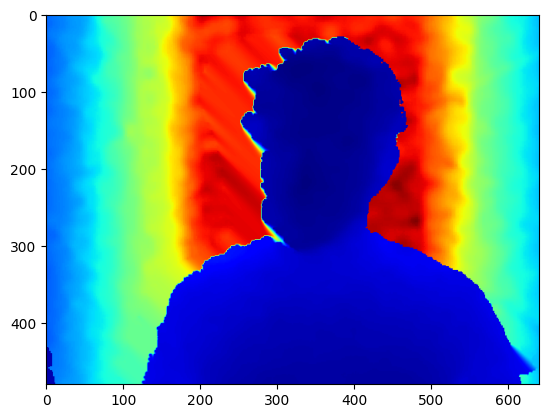

In [164]:
plt.imshow(height_m, cmap='jet')

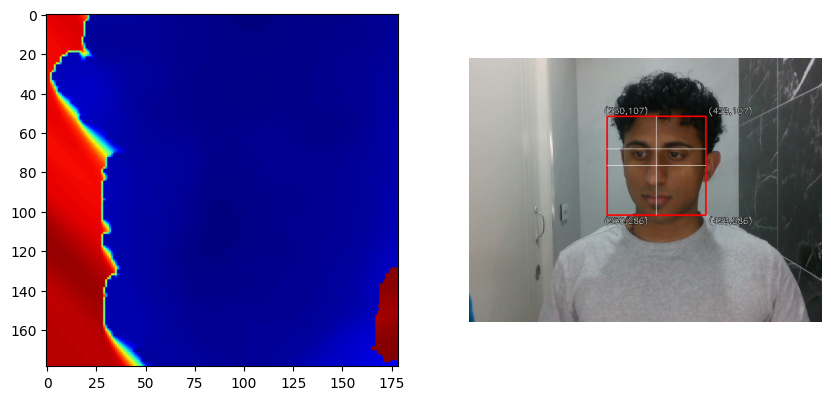

In [165]:
x, y, w, h = faces[0]

# Draw rectangle around face
cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Annotate corners with coordinates
tl = f"({x},{y})"
tr = f"({x+w},{y})"
bl = f"({x},{y+h})"
br = f"({x+w},{y+h})"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
thickness = 1
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (255, 255, 255), thickness)

# Extract ROI for facial features
roi_gray = gray[y:y+h, x:x+w]
roi_height = height_m[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)
nose = nose_cascade.detectMultiScale(roi_gray)

features = {'face': (x, y, w, h)}

# Draw reference lines
cv2.line(img2, (x + int(w/2), y), (x + int(w/2), y + h), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/3)), (x + w, y + int(h/3)), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/2)), (x + w, y + int(h/2)), (255, 255, 255), 1)


fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(roi_height, cmap='jet')
plt.subplot(122)
plt.imshow(img2)


# plt.imshow(img2)
plt.axis('off')
plt.show()


a left eye detected
Left eye is in upper 3/5 of face
Left eye detected at: (309, 175)
a right eye detected
Right eye detected at: (374, 177)


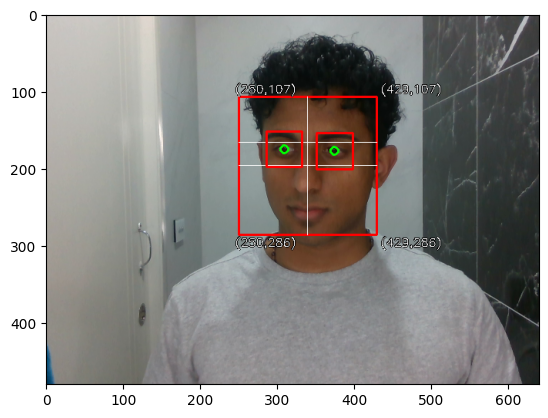

In [166]:
exp = 30

for (ex, ey, ew, eh) in eyes:
    center = (int(x + ex + ew/2), int(y + ey + eh/2))

    if center[0] < x + w/2:
        print("a left eye detected")
        if center[1] < y + 3*h/5:
            print("Left eye is in upper 3/5 of face")
            if 'eye_left' in features:
                print("Multiple left eyes detected, skipping")
                continue


            cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)

            left_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            features['eye_left'] = center
            cv2.circle(img2, center, 5, (0, 255, 0), 2)
            print("Left eye detected at:", center)
        
    if center[0] > x + w/2:
        print("a right eye detected")

        if center[1] < y + 3*h/5:
            if 'eye_right' in features:
                print("Multiple right eyes detected, skipping")
                continue
            
            
            right_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]
            cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)
            features['eye_right'] = center
            cv2.circle(img2, center, 5, (0, 255, 0), 2)
            print("Right eye detected at:", center)


plt.imshow(img2)





In [167]:
# plt.subplot(122)
# plt.imshow(right_eye_height_map, cmap='jet')
# plt.subplot(121)
# plt.imshow(left_eye_height_map, cmap='jet')

Tip of Nose detected at: 14 29
Nose detected at: (336, 216)
No nose detected or position constraints not met.


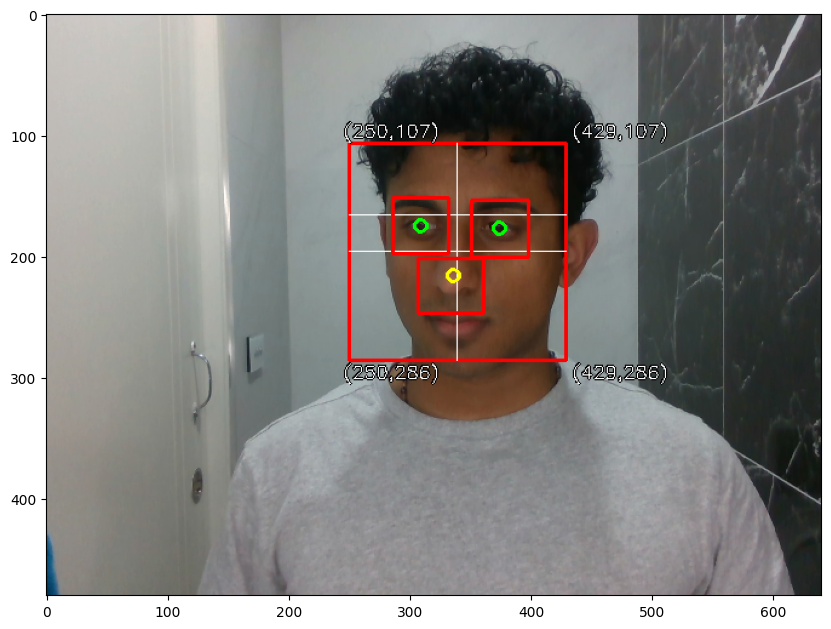

In [168]:
for (nx, ny, nw, nh) in nose:
    nose_center = (int(x + nx + nw/2), int(y + ny + nh/2))
    # Verify nose position relative to eyes
    if ('eye_left' in features and 'eye_right' in features and
        nose_center[1] > features['eye_left'][1] and
        nose_center[1] > features['eye_right'][1] and
        nose_center[0] > features['eye_left'][0] and
        nose_center[0] < features['eye_right'][0]):
        cv2.rectangle(img2, (x + nx, y + ny), (x + nx + nw, y + ny + nh), (255, 0, 0), 2)
        # cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        # print("Nose detected at:", nose_center)
        # features['nose'] = nose_center

        
        # Extract nose height map (correct coordinates)
        nose_height_map = height_m[y + ny:y + ny + nh, x + nx:x + nx + nw]

        expand = 35
        nose_height_map_wide = height_m[y + ny - expand : y + ny + nh + expand, x + nx - expand : x + nx + nw + expand]

        

        # print(nose_height_map[0:10, :])
        min_index = np.argmin(nose_height_map)  # Result: 1 (position of 1)
        row, col = np.unravel_index(min_index, nose_height_map.shape)  # Result: (0, 1)

        print("Tip of Nose detected at:", row, col)

        nose_depth = np.min(nose_height_map)

        nose_center = (int(x + nx + col), int(y + ny + row))
        cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        print("Nose detected at:", nose_center)
        features['nose'] = (nose_center, nose_depth)

        fig = plt.figure(figsize=(10, 30))
        # plt.subplot(311)
        # plt.imshow(nose_height_map, cmap='jet')
        # plt.subplot(312)
        # plt.imshow(img2)
        # plt.subplot(313)
        # plt.imshow(nose_height_map_wide, cmap='jet')

        plt.imshow(img2)

    else:
        print("No nose detected or position constraints not met.")


In [169]:
print(features)

{'face': (np.int32(250), np.int32(107), np.int32(179), np.int32(179)), 'eye_left': (309, 175), 'eye_right': (374, 177), 'nose': ((336, 216), np.float64(0.5290000438690186))}
